<a href="https://colab.research.google.com/github/shakurovas/pt-ms_gb/blob/master/homework3_pt%26ms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from math import factorial as fact

In [ ]:
def combinations_without_repetitions(n, m): # n элементов из m (сочетания без повторений)
  return fact(m) / (fact(n) * fact(m-n))

**Задание 1:** Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

**Решение:**

In [ ]:
salary_list = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

Среднее арифметическое:

In [ ]:
avg = np.sum(salary_list) / len(salary_list)
print(avg)

65.3


Проверим:

In [ ]:
np.mean(salary_list)

65.3

Среднее квадратичное отклонение:

In [ ]:
sum = 0
for i in range(len(salary_list)):
  sum += (salary_list[i] - avg) ** 2
S = (sum / (len(salary_list) - 1)) ** (1/2)
print(S)

31.624607341019814


Проверим:

In [ ]:
np.std(salary_list, ddof=1)

31.624607341019814

Смещённая оценка дисперсии:

In [ ]:
sum = 0
for i in range(len(salary_list)):
  sum += (salary_list[i] - avg) ** 2
S_2 = sum / len(salary_list)
print(S_2)

950.11


Проверим:

In [ ]:
np.var(salary_list)

950.11

Несмещённая оценка дисперсии:

In [ ]:
sum = 0
for i in range(len(salary_list)):
  sum += (salary_list[i] - avg) ** 2
S_2_2 = sum / (len(salary_list) - 1)
print(S_2_2)

1000.1157894736842


Проверим:

In [ ]:
np.var(salary_list, ddof=1)

1000.1157894736842

**Задание 2:** В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике - 12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?

**Решение:**

Вероятность того, что достанут оба белых мяча из первого ящика и при этом только один из тех мячей, которые достали из второго ящика, окажется белым:

In [ ]:
P_2_1 = combinations_without_repetitions(2, 5) * combinations_without_repetitions(0, 3) / combinations_without_repetitions(2, 8) * combinations_without_repetitions(1, 5) * combinations_without_repetitions(3, 7) / combinations_without_repetitions(4, 12)
print(P_2_1)

0.12626262626262627


Вероятность того, что достанут один белый мяч из первого ящика и при этом только два из тех мячей, которые достали из второго ящика, окажутся белыми:

In [ ]:
P_2_2 = combinations_without_repetitions(1, 5) * combinations_without_repetitions(1, 3) / combinations_without_repetitions(2, 8) * combinations_without_repetitions(2, 5) * combinations_without_repetitions(2, 7) / combinations_without_repetitions(4, 12)
print(P_2_2)

0.22727272727272724


Вероятность того, что достанут ни одного белого мяча из первого ящика и при этом три из тех мячей, которые достали из второго ящика, окажутся белыми:

In [ ]:
P_2_3 = combinations_without_repetitions(0, 5) * combinations_without_repetitions(2, 3) / combinations_without_repetitions(2, 8) * combinations_without_repetitions(3, 5) * combinations_without_repetitions(1, 7) / combinations_without_repetitions(4, 12)
print(P_2_3)

0.015151515151515152


Итого вероятность достать каким-либо из этих вариантов 6 шаров (2 из первого ящика, 4 из второго) так, чтобы среди них оказались ровно 3 белых, равняется:

In [ ]:
P_2 = P_2_1 + P_2_2 + P_2_3
print(P_2) 

0.3686868686868686


**Задание 3:** На соревновании по биатлону один из трех спортсменов стреляет и попадает в мишень. Вероятность попадания для первого спортсмена равна 0.9, для второго — 0.8, для третьего — 0.6. Найти вероятность того, что выстрел произведен: a) первым спортсменом б) вторым спортсменом в) третьим спортсменом.

**Решение (а):**

Используем формулу Байеса: 
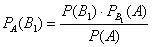

Найдём вероятность (P(A)) того, про произойдёт событие А (выстрел попал в мишень):

In [ ]:
P_A = 1 / 3 * 0.9 + 1 / 3 * 0.8 + 1 / 3 * 0.6
print(P_A)

0.7666666666666666


Теперь подставим 1/3 (вероятность выбора спортсмена) и вероятности его попадания в цель:

In [ ]:
P_3a = 1 / 3 * 0.9 / P_A
print(P_3a)

0.391304347826087


**Решение (б):**

In [ ]:
P_3b = 1 / 3 * 0.8 / P_A
print(P_3b)

0.3478260869565218


**Решение (в):**

In [ ]:
P_3c = 1 / 3 * 0.6 / P_A
print(P_3c)

0.2608695652173913


**Задание 4:** В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A б) на факультете B в) на факультете C?

**Решение (а):**

Пусть x (студентов) учатся и на А, и В факультетах (на каждом из них в отдельности).
Тогда 2*х (студентов) учатся на факультете С. Всего на 3х факультетах: 4*х студентов

Вероятность того, что отдельно взяты студент:
1) с первого факультета: х / 4х = 1/4;
2) со второго факультета: х / 4х = 1/4;
3) с третьего факультета: 2х / 4х = 1/2;

Будем использовать формулу Байеса. Найдём вероятность (P(A)) того, про произойдёт событие А (студент сдаст первую сессию):

In [ ]:
P_A = 1 / 4 * 0.8 + 1 / 4 * 0.7 + 1 / 2 * 0.9
print(P_A)

0.825


Теперь подставим вероятность того, что студент с перввого факультета и вероятность того, что он сдаст эту сессию:

In [ ]:
P_4a = 1 / 4 * 0.8 / P_A
print(P_4a)

0.24242424242424246


**Решение (б):**

In [ ]:
P_4b = 1 / 4 * 0.7 / P_A
print(P_4b)

0.21212121212121213


**Решение (в):**

In [ ]:
P_4c = 1 / 2 * 0.9 / P_A
print(P_4c)

0.5454545454545455


**Задание 5:** Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: а) все детали б) только две детали в) хотя бы одна деталь г) от одной до двух деталей?

**Решение (а):**

In [ ]:
P_5a = 0.1 * 0.2 * 0.25
print(P_5a) 

0.005000000000000001


**Решение (б):**

In [3]:
P_5b = 0.1 * 0.2 * 0.75 + 0.1 * 0.8 * 0.25 + 0.9 * 0.2 * 0.25
print(P_5b)

0.08000000000000002


**Решение (в):**

In [1]:
P_5c = 1 - 0.9 * 0.8 * 0.75
print(P_5c)

0.45999999999999996


**Решение (г):**

In [4]:
P_5d = P_5b + 0.1 * 0.8 * 0.75 + 0.9 * 0.2 * 0.75 + 0.9 * 0.8 * 0.25
print(P_5d)

0.45500000000000007
